# Particle in an box with infinite-potential walls

## Authors:

The Jupyter notebook is provided for the introductory Quantum Physics course at the University of York.

**These Jupyter notebooks are based on the excellent work by the following authors:

* [Vinícius Wilian D. Cruzeiro](https://scholar.google.com/citations?user=iAK04WMAAAAJ). E-mail: vwcruzeiro@ufl.edu
* Xiang Gao. E-mail: qasdfgtyuiop@ufl.edu
* [Valeria D. Kleiman](http://kleiman.chem.ufl.edu/). E-mail: kleiman@ufl.edu
Department of Chemistry, Physical Chemistry Division, University of Florida**

Cite: J. Chem. Educ. 2019, 96, 8, 1663–1670, Publication Date:July 11, 2019. https://doi.org/10.1021/acs.jchemed.9b00195

In [4]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
from sympy import *
from IPython.display import display, Latex, Markdown
import warnings
warnings.filterwarnings('ignore')

## Particle in a 1D box

Below is a schematic representation of the potential known as the infinite square well. We will only consider motion in one dimension but next year you will see how this problem can be extended to two and three dimensions. In this case a particle is restricted to moving only in the x direction. The potential is zero in the region $0\le x\le L$ but infinite in the regions $x<0$ and $x>L$. This restricts the particle to moving *only* in the region $0\le x\le L$. In other words it is not possible for the particle to have a position greater than $L$ or less than $0$.

<img src="https://drive.google.com/uc?id=1RPhhM9qMmrJkKifl8xfAAljUczoYtUqN">

The one dimension time independent Schrödinger (1D TISE) is:

$$
\frac{-\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial{x}^2}+V(x) =E\psi(x) \tag{1}
$$


In the region $0\le x\le L$, the potential $V(x)$ is equal to zero, therefore the Schrödinger equation for this system is given by:

$$
\frac{-\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial{x}^2} =E\psi(x) \tag{2}
$$



## Boundary conditions

Since the potential is infinity outside the box, the wave function must obey the following ***Boundary Conditions***:

$$
\psi(0)=\psi(L)=0 \tag{3}
$$

where *L* is the length of the box.

## Choosing the appropriate wave function

Our particle trapped in the box will propagate both towards the potential at $L$ and the back towards the potential at $0$.The wave function must therefor have both a positive and a negative momentum to fully describe the behaviour. 

$$
\psi(x)=A_1e^{ikx}+B_1e^{-ikx}
$$

The amplitudes $A_1$ and $B_1$ can be complex and it is most convenient to rewrite this using Euler as a sum of sine and cosine. This gives us the most general form of the wave function suitable for the infinite square well.

$$\psi(x)=A\sin(kx)+B\cos(kx)$$

We will choose this form for particle confined between two potential barriers because, and only because, it makes the maths easier. There is no other reason and you can use the exponential form to solve the problem, but the algebra is often more complex.


## Applying the boundary conditions

Now we will apply the boundary conditions given by (3), doing this first for $x=0$ we find:

$$
A\sin(k0)+B\cos(k0)=0
$$

and because $\cos(k0)=1$,

$$
B=0
$$

This tells us that the cosine term does not contribute in this case (note it will be useful in other situations and whether it is non-zero or zero depends on the choice of boundary conditions).

Now we repeat for the boundary at $x=L$ and we find

$$
A\sin(kL)=0
$$

we can make this zero by suitable choices of $kL$, 

$$
\therefore kL=n\pi
$$

## Normalising the wave function

We can obtain the expression for $A$ by normalising the wave function.

$$
A^2\int_0^L \sin^2(kx)dx=1
$$

After normalising the wavefunction and solving at the boundary conditions, the eigenfunctions obtained are given by:

$$\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi}{L}x\right)$$
where  $n=1, 2, ..., \infty $. Note we call this an **eigenfunction**, this is the characteristic function that describes this particular system and is just a naming convention derived from the underlying mathematical theory. It is important that you understand what this equation tells you and to be able to recall the name. However, you will hear the term wavefunction and eigenfunction being employed interchangeably.  

It is important to emphasize that the quantization (*n* being only positive integers) is a consequence of the boundary conditions.

Here are a few questions to think about before we move on:
   * **Q1:** Can you infer, just looking at the graphical representations of $\psi_n(x)$ or $|\psi_n(x)|^2$, what is the quantum state (labeled by its quantum number) *n*?
   * **Q2:** What is a node? How do the nodes relate to the Kinetic Energy of the system?
   * **Q3:** Is it possible to find the particle outside the box?
   * **Q4:** Does it matter that $\psi_n(x)$ has negative values?  
   * **Q5:** What variables and parameters does $\psi_n(x)$ depend on?

Some of these questions can be answered by plotting the **Wavefunction**, $\psi_n(x)$ and the **Probability Density**, $|\psi_n(x)|^2$ for different values of $n$.

As with all of these notes there is an live version of this notebook on Google colab that you can interact with and change the variables. The questions above can be answered by following the link below, running the notebook and then playing with the variable and interpreting the outputted functions. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pW27Lo0zspij_6KBVAnoVlDL4jQ-s_pT)

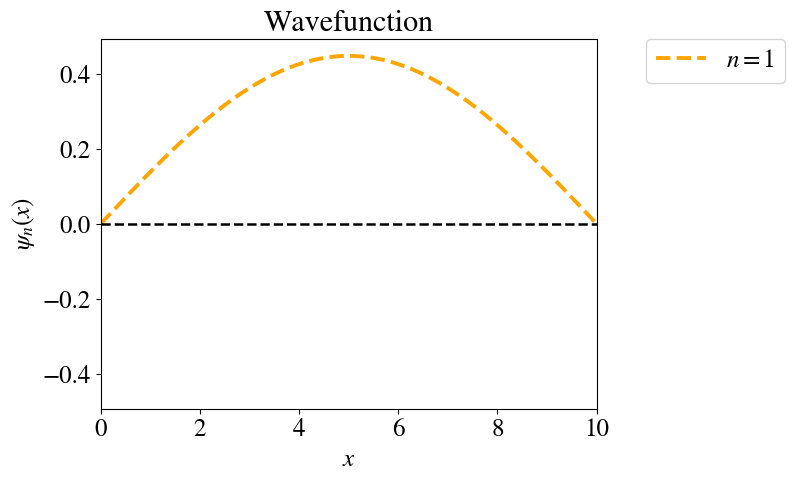

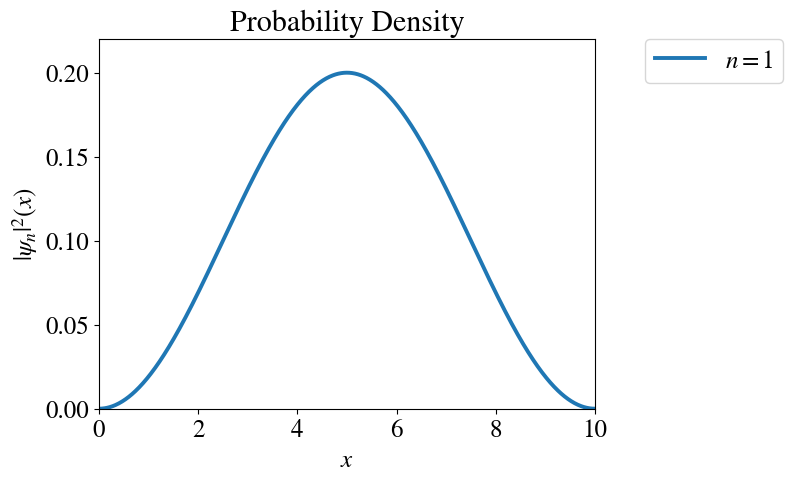

In [7]:
# Defining the wavefunction
def psi(x,n,L): return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

# Reading the input variables from the user
n = 1 #int(input("Enter the value for the quantum number n = "))
L = 10 #float(input("Enter the size of the box in Angstroms = "))

# Generating the wavefunction graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.linspace(0, L, 900)
fig, ax = plt.subplots()
lim1=np.sqrt(2.0/L) # Maximum value of the wavefunction
ax.axis([0.0,L,-1.1*lim1,1.1*lim1]) # Defining the limits to be plot in the graph
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L), linestyle='--', label=str1, color="orange", linewidth=2.8) # Plotting the wavefunction
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") # Adding a horizontal line at 0
# Now we define labels, legend, etc
ax.legend(loc=2);
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi_n(x)$')
plt.title('Wavefunction')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Generating the probability density graph
fig, ax = plt.subplots()
ax.axis([0.0,L,0.0,lim1*lim1*1.1])
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L)*psi(x,n,L), label=str1, linewidth=2.8)
ax.legend(loc=2);
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_n|^2(x)$')
plt.title('Probability Density')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

*Figure:* The wave function for the $n=1$ state in the infinite square well.

We can explore the changes in the **Wavefunction** and **Probability Density** for a given state *n* in boxes of different length $L$: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pW27Lo0zspij_6KBVAnoVlDL4jQ-s_pT)

In [ ]:
#@title Plotting the wavefunction { vertical-output: true, form-width: "60%", display-mode: "form" }
# Reading the input boxes sizes from the user, and making sure the values are not larger than 20 A
L = 100.0
while(L>20.0):
    L1 = 18 #float(input(" To compare wavefunctions for boxes of different lengths \nenter the value of L for the first box  (in Angstroms and not larger then 20 A) = "))
    L2 = 12 #float(input("Enter the value of L for the second box (in Angstroms and not larger then 20) = "))
    L = max(L1,L2)
    if(L>20.0):
        print ("The sizes of the boxes cannot be larger than 20 A. Please enter the values again.\n")

# Generating the wavefunction and probability density graphs
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(12,6))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(L1,L2)
X1 = np.linspace(0.0, L1, 900,endpoint=True)
X2 = np.linspace(0.0, L2, 900,endpoint=True)
ax.axis([-0.5*val,1.5*val,-np.sqrt(2.0/L),3*np.sqrt(2.0/L)])
ax.set_xlabel(r'$X$ (Angstroms)')
strA="$\psi_n$"
strB="$|\psi_n|^2$"
ax.text(-0.12*val, 0.0, strA, rotation='vertical', fontsize=30, color="black")
ax.text(-0.12*val, np.sqrt(4.0/L), strB, rotation='vertical', fontsize=30, color="black")
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.plot(X1,psi(X1,n,L1)*np.sqrt(L1/L), color="red", label=str1, linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*np.sqrt(L2/L), color="blue", label=str2, linewidth=2.8)
ax.plot(X1,psi(X1,n,L1)*psi(X1,n,L1)*(L1/L) + np.sqrt(4.0/L), color="red", linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*psi(X2,n,L2)*(L2/L) + np.sqrt(4.0/L), color="blue", linewidth=2.8)
ax.margins(0.00)
ax.legend(loc=9)
str2="$V = +\infty$"
ax.text(1.03*val,  0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=40, color="black")
ax.text(-0.3*val, 0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=40, color="black")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(L1, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.vlines(L2, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black")
ax.hlines(np.sqrt(4.0/L), 0.0, L, linewidth=1.8, linestyle='--', color="black")
plt.title('Wavefunction and Probability Density', fontsize=30)
str3=r"$n = "+str(n)+r"$"
ax.text(1.1*L,np.sqrt(4.0/L), r"$n = "+str(n)+r"$", fontsize=25, color="black")
plt.legend(bbox_to_anchor=(0.73, 0.95), loc=2, borderaxespad=0.)

# Show the plots on the screen once the code reaches this point
plt.show()

*Figure:* The Energy eigen function and the probability density function for the $n=1$ state in two infinite square wells. One of length 10 Angstroms and the other of length 18 Angstroms. 

## Energy eigen functions and energy eigen values

By solving at the boundary conditions we found an expression for the wave function with quantized wave number $k$:

$$\psi_n(x)=\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)$$

These are the energy eigenfunctions of the system, there is one for each value of n. 

The values of $E$ that allow the above to be a solution to the Schrodinger equation are called eigenvalues. In this case the energy eigenvalues. To find the energy eigenvalues $E_n$ we must solve the TISE, when the potential is zero this is given by:

$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)=E\psi(x)$$

First we determine the second derivative of the wavefunction:

$$\frac{d^2\psi}{dx^2}=-k^2\sqrt{\frac{2}{L}}\sin(kx)$$

Substituting this into the TISE gives:

$$\frac{\hbar^2}{2m}k^2\sqrt{\frac{2}{L}}\sin(kx)=E\sqrt{\frac{2}{L}}\sin(kx)$$

Making $E$ the subject and substituting in the expression for the quantised values of $k$, the energy eigenvalues are:

$$E_n=\left(\frac{n\pi}{L}\right)^2\frac{\hbar^2}{2m}$$


We can also look at the **allowed values of energy**, given by:
$$E_n = \frac{n^2 h^2}{8mL^2}$$  
where *m* is the mass of the particle.

**Note:** Did you notice that $\psi_n(x)$ doesn't depend on the mass of the particle? How does this get introduced into the energy eigen values? This occurs when the Schrodinger equation is applied to the energy eigen functions. This is an operator, the Hamiltonian, and returns in this case the kinetic energy of the particle. This does depend on mass of the particle. 

In contrast to the solution in the free particle system, for a particle confined within the box, not every energy value is allowed. We see that quantization is a direct consequence of the boundary condition. In other words: confinement leads to quantization.

Let's now analyze how the **Energy Levels** $E_n$ for an electron change as a function of the **size of the box**.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pW27Lo0zspij_6KBVAnoVlDL4jQ-s_pT)

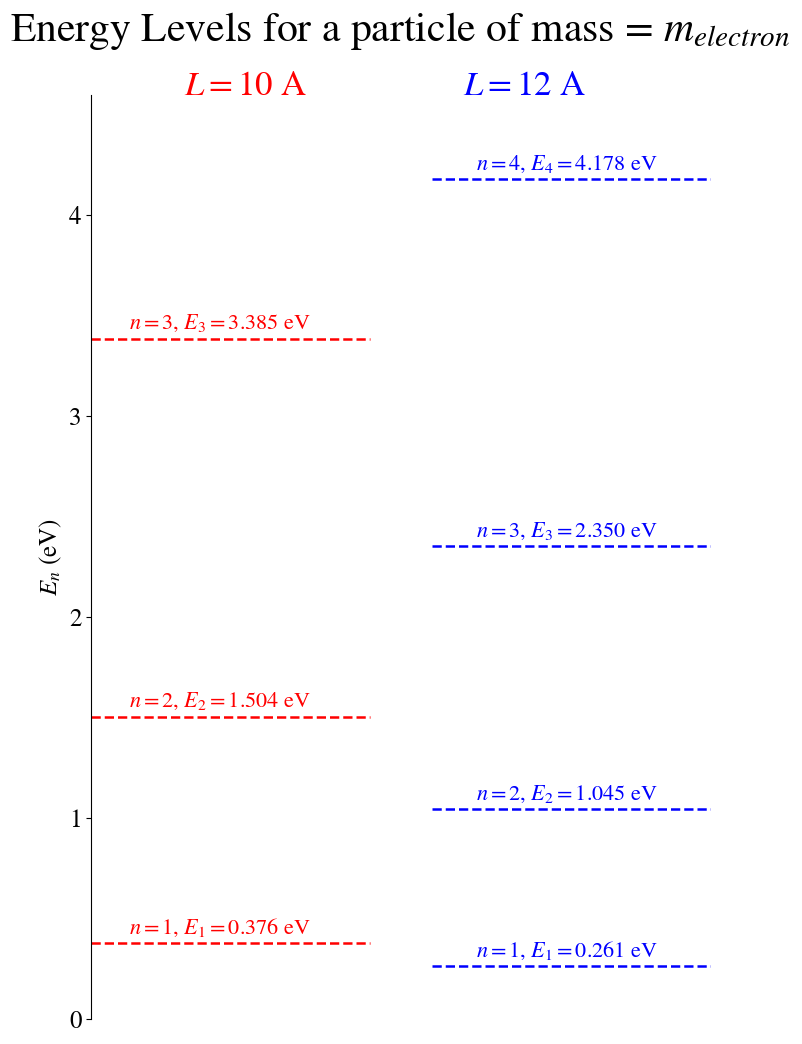

In [9]:
#Given the following parameters

h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy

def En(n,L,m): return (h**2 / (m*8))* (1e10)**2 *6.242e+18*((float(n)/L)**2)

# Reading the input variables from the user
L1 = 10 #float(input(" To see how the energy levels change for boxes of different lengths, \nenter the value for L for the first box (in Angstroms) = "))
nmax1 = 3 #int(input("Enter the number of levels you want to plot for the first box = "))
L2 = 12 #float(input("Enter the value for L for the second box (in Angstroms) = "))
nmax2 = 4 #int(input("Enter the number of levels you want to plot for the second box = "))

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(En(nmax1,L1,me),En(nmax2,L2,me))
val2= 1.1*max(L1,L2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L1,me))
    ax.text(0.6, En(n,L1,me)+0.01*val, str1, fontsize=16, color="red")
    ax.hlines(En(n,L1,me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="red")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L2,me))
    ax.text(6.2, En(n,L2,me)+0.01*val, str1, fontsize=16, color="blue")
    ax.hlines(En(n,L2,me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="blue")
str1=r"$L = "+str(L1)+r"$ A"
plt.title("Energy Levels for a particle of mass = $m_{electron}$ \n ", fontsize=30)
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.text(1.5,val, str1, fontsize=25, color="red")
ax.text(6,val, str2, fontsize=25, color="blue")

# Show the plots on the screen once the code reaches this point
plt.show()

*Figure:* A comparison of allowed energy eigen values for an electron in an infinite square well of length 10 Angstroms and one of length 12 Angstroms. Note that making the well longer reduces the energy of each state, the energy difference between states also reduces. 

  
  
and how the *Energy Levels*, $E_n$  change as a function of the **mass of the particle**.




 Eenter the value for L for both boxes (in Angstroms) = 10
 To see how the energy levels change for particles of different mass, 
Enter the value of the mass for the first particle (in units of the mass of 1 electron) = 1
Enter the number of levels you want to plot for the first box = 3
Enter the value of the mass for the second particle (in units of the mass of 1 electron) = 3
Enter the number of levels you want to plot for the second box = 3


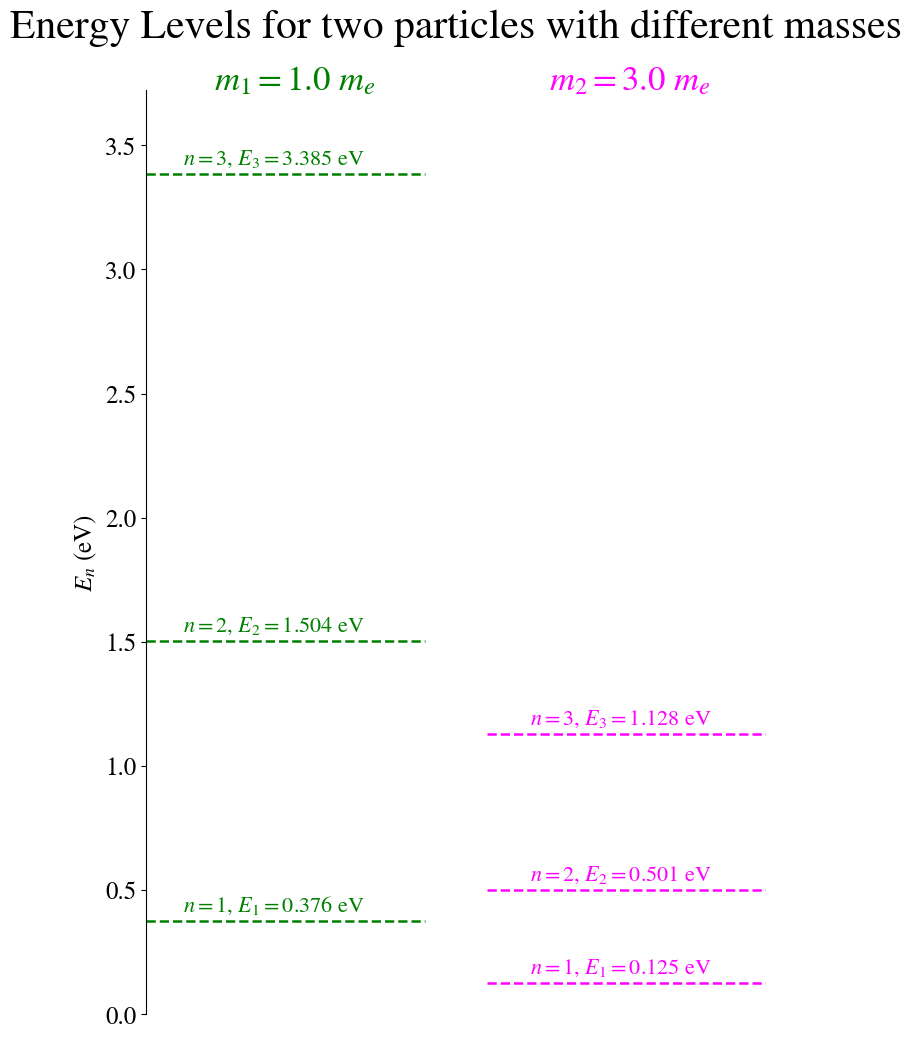

In [10]:
#@title Compare the eigenvalues for particles of different mass in the same infinite square well { vertical-output: true, form-width: "60%", display-mode: "form" }
# Reading the input variables from the user
L = 10 #float(input(" Eenter the value for L for both boxes (in Angstroms) = "))
m1 = 1 #float(input(" To see how the energy levels change for particles of different mass, \nEnter the value of the mass for the first particle (in units of the mass of 1 electron) = "))
nmax1 = 3 #int(input("Enter the number of levels you want to plot for the first box = "))
m2 = 3 #float(input("Enter the value of the mass for the second particle (in units of the mass of 1 electron) = "))
nmax2 = 3 #int(input("Enter the number of levels you want to plot for the second box = "))

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(En(nmax1,L,m1*me),En(nmax2,L,m2*me))
val2= 1.1*max(m1,m2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m1*me))
    ax.text(0.6, En(n,L,m1*me)+0.01*val, str1, fontsize=16, color="green")
    ax.hlines(En(n,L,m1*me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="green")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m2*me))
    ax.text(6.2, En(n,L,m2*me)+0.01*val, str1, fontsize=16, color="magenta")
    ax.hlines(En(n,L,m2*me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="magenta")
str1=r"$m = "+str(m1)+r"$ A"
plt.title("Energy Levels for two particles with different masses\n ", fontsize=30)
str1=r"$m_1 = "+str(m1)+r"$ $m_e$ "
str2=r"$m_2 = "+str(m2)+r"$ $m_e$ "
ax.text(1.1,val, str1, fontsize=25, color="green")
ax.text(6.5,val, str2, fontsize=25, color="magenta")

# Show the plots on the screen once the code reaches this point
plt.show()

*Figure: * A comparison of the energy eigen values for a particle with the mass of an electron in a well of length 10 Angstroms and a particle of mass three times the mass of an electron in the same length well. Again, note the reduction in both energy and the energy difference between states. 

## Combined wavefunction, probability density and energy plots.

We can combine the information from the wavefunctions, probability density, and energies into a single plot that compares the wavefunctions and the probability densities for different states, each one represented at its energy value. These plots are made using the electron mass.

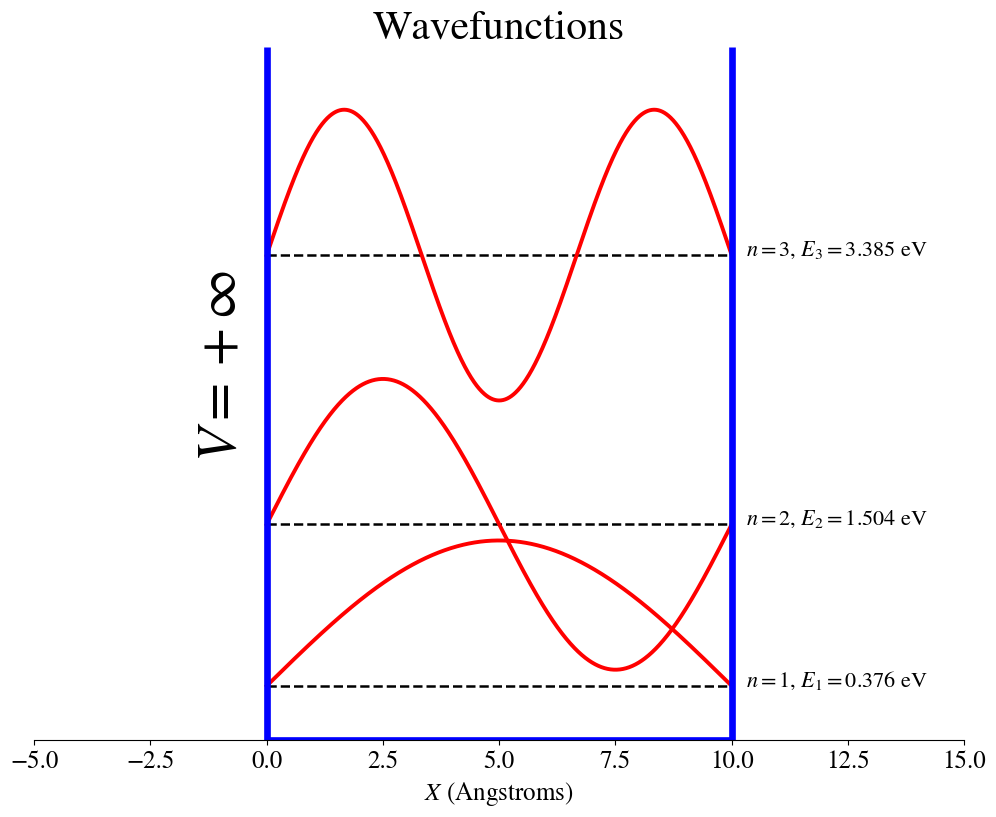

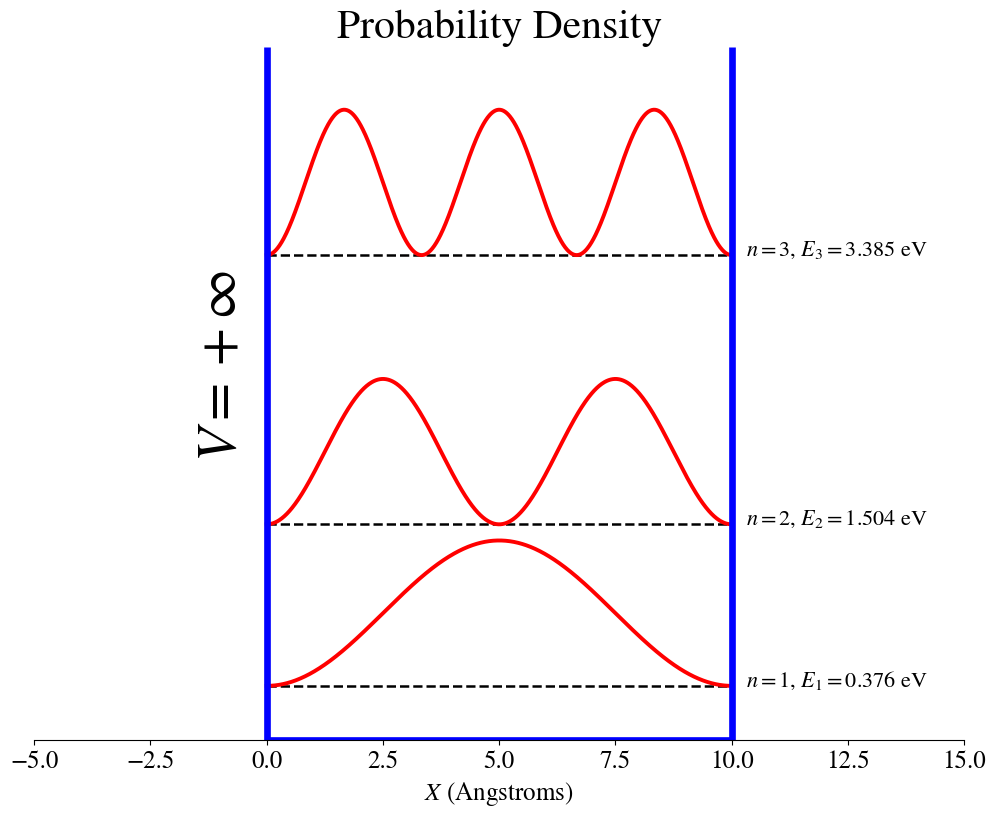

In [14]:
# Here the users inputs the value of L
L = 10 #float(input("Enter the value of L (in Angstroms) = "))
nmax = 3 #int(input("Enter the maximum value of n you want to plot = "))

# Generating the wavefunction graph
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
amp = (En(2,L,me)-En(1,L,me)) *0.9
Etop = (Emax+amp)*1.1
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')

for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+amp*np.sqrt(L/2.0)*psi(X3,n,L), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Wavefunctions', fontsize=30)
#plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=40, color="black")

# Generating the probability density graph
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')
for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+ amp*(np.sqrt(L/2.0)*psi(X3,n,L))**2, color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Probability Density', fontsize=30)
#plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=40, color="black")

# Show the plots on the screen once the code reaches this point
plt.show()